<a href="https://colab.research.google.com/github/EllaThomasson/labs-ds3001/blob/main/WebScrapingLab_EllaThomasson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

In [38]:
# I am choosing to look at the appts/housing options on craigslist

# I will look at price, location, and type of house/appartment information.
# Based on this, I will understand the distribution of the price of homes on craigslist
# I will also attempt to understand type of homes on craigslist, as wekk as price per type.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/apa#search=1~gallery~0~0'
raw = requests.get(url,headers=header)


Question 2

In [39]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [56]:
import re  # Regular expressions
import numpy as np  # Ensure you have numpy imported
from bs4 import BeautifulSoup  # Ensure you have BeautifulSoup imported

types = ['camper', 'apartment', 'cottage', 'townhouse', 'ranch', 'house', 'home', 'dog','apt','apartments']

data = []  # We'll save our listings in this object
for k in range(len(listings)):
    # Get the title and convert it to lowercase
    title = listings[k].find('div', class_='title').get_text(strip=True).lower() if listings[k].find('div', class_='title') else 'missing'
    price = listings[k].find('div', class_='price').get_text(strip=True) if listings[k].find('div', class_='price') else 'missing'

    # Correctly find the details div first, then the location
    details = listings[k].find('div', class_='details')
    location = details.find('div', class_='location').get_text(strip=True) if details and details.find('div', class_='location') else 'missing'

    link = listings[k].find('a')['href'] if listings[k].find('a') else 'missing'

    # Get types from the title string:
    words = title.split()
    hits = [word for word in words if word in types]  # Find types in the title
    types_found = hits[0] if hits else 'missing'

    # Append the current listing's data to the list, without the year
    data.append({'title': title, 'price': price, 'location': location, 'link': link, 'types': types_found})



Question 3

In [57]:
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
display(df)

,title,price,location,link,types
0,apartment,900,Woolen Mills Charlottesville,https://charlottesville.craigslist.org/apa/d/c...,apartment
1,looking for a place to stay while looking for ...,1995,Barboursville,https://charlottesville.craigslist.org/apa/d/b...,missing
2,extended stay cottage at montfair resort farm,1950,Crozet,https://charlottesville.craigslist.org/apa/d/c...,cottage
3,"available oct 1 , being repainted now. 2 bedrooms",1250,FREE UNION,https://charlottesville.craigslist.org/apa/d/f...,missing
4,camper spot waynesboro,1,Waynesboro,https://charlottesville.craigslist.org/apa/d/w...,camper
...,...,...,...,...,...
97,all in. a great place to stay while you're loo...,1995,Barboursville,https://charlottesville.craigslist.org/apa/d/b...,missing
98,attention--->luxury stonefield 2 br-all inclusive,2350,missing,https://charlottesville.craigslist.org/apa/d/c...,missing
99,mountain views,1125,"Standardsville, Va",https://charlottesville.craigslist.org/apa/d/r...,missing
100,609 e. market st.#301 fully furnished luxury s...,2500,Downtown Charlottesville,https://charlottesville.craigslist.org/apa/d/c...,missing


In [67]:
df['types'] = df['types'].replace({
    'apartment': 'Apartment',
    'apartments': 'Apartment',
    'apt': 'Apartment',
    'home': 'House',
    'house': 'House'
})

no_missing = df[df['types'] != 'missing']

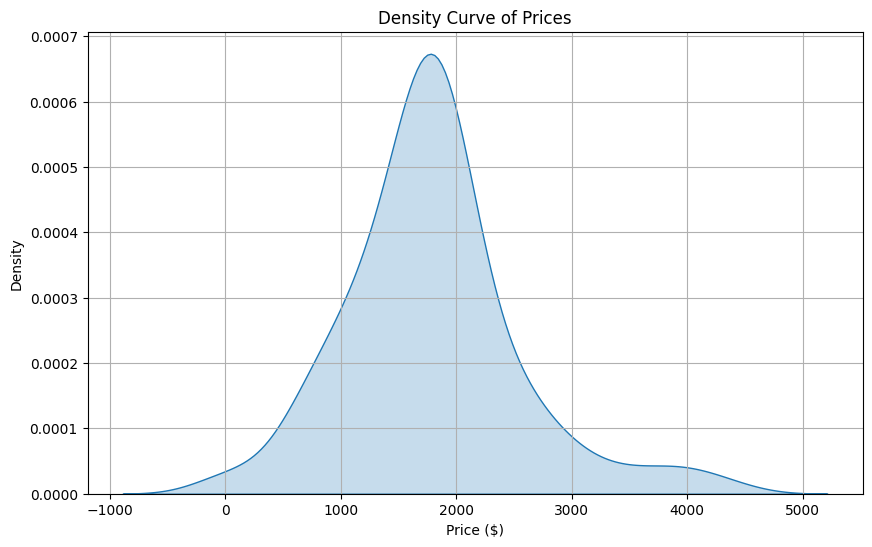

In [68]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['price'].dropna(), fill=True)
plt.title('Density Curve of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Density')
plt.grid()
plt.show()

The average price of homes/apartments on craigslist is a little less than $2,000. It is approximately bell shaped.  

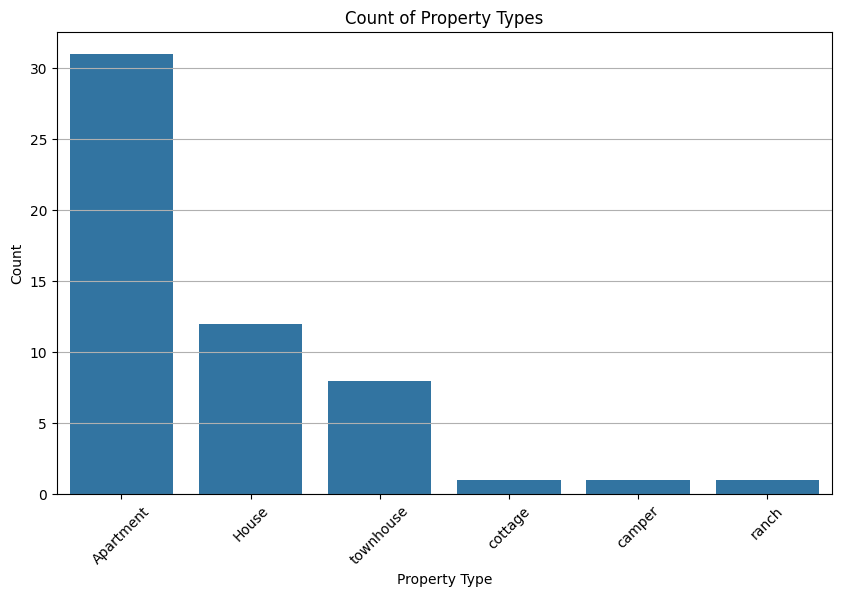

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=no_missing, x='types', order=no_missing['types'].value_counts().index)
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Most of the posts on craigslist are about apartments. The next most are about houses, then townhouses.

<ipython-input-71-978ab255417b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_per_type, x='Type', y='Average Price', palette='viridis')


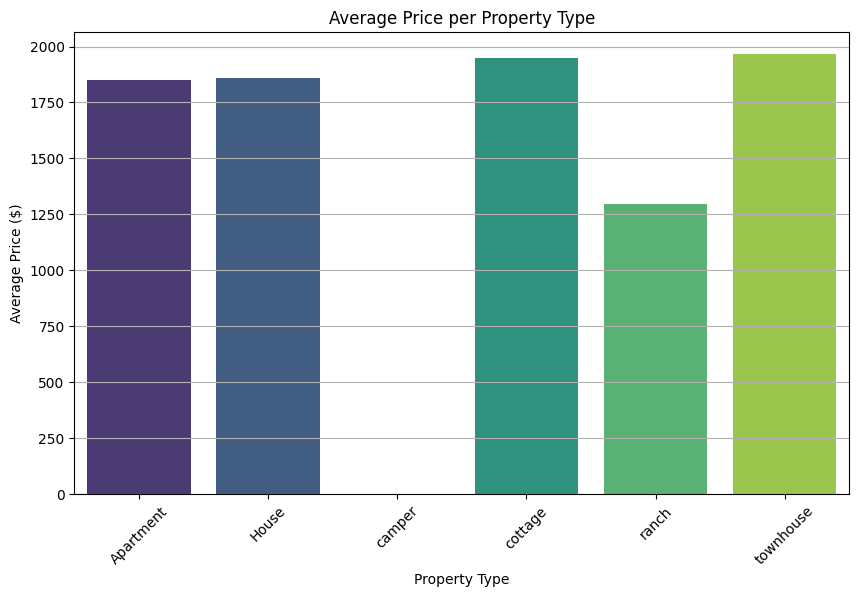

In [71]:
average_price_per_type = no_missing.groupby('types')['price'].mean().reset_index()
average_price_per_type.columns = ['Type', 'Average Price']

plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_per_type, x='Type', y='Average Price', palette='viridis')
plt.title('Average Price per Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Ranches seem to be a bit cheaper than apartments, houses, cottages, and townhouses. Townhouses and cottages seem to be a bit more expensive. The trends seen here are likely not reliable though because there is not enough data for the cottage, ranch, and camper types.